<a href="https://colab.research.google.com/github/itspallavi20/DL-Simplified/blob/main/BP%20Monitor%20Reading%20using%20DL%20/Model/dl_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
base_dir = '/content/drive/My Drive/BP_Monitor_Reading_Project/'
os.makedirs(base_dir + 'Images', exist_ok=True)
os.makedirs(base_dir + 'Dataset', exist_ok=True)
os.makedirs(base_dir + 'Model', exist_ok=True)
with open(base_dir + 'requirements.txt', 'w') as f:
    f.write('Following are the libraries used in creation of models:\n')
    f.write('tensorflow==2.x.x\n')
    f.write('numpy\n')
    f.write('pandas\n')
    f.write('matplotlib\n')
    f.write('scikit-learn\n')
    f.write('pickle\n')
    f.write('keras\n')
    f.write('opencv-python\n')
    f.write('seaborn\n')


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d dataclusterlabs/bp-monitor-reading-medical-device-images

Dataset URL: https://www.kaggle.com/datasets/dataclusterlabs/bp-monitor-reading-medical-device-images
License(s): CC0-1.0
 99% 492M/497M [00:17<00:00, 34.6MB/s]
100% 497M/497M [00:17<00:00, 30.4MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  bp-monitor-reading-medical-device-images.zip
  inflating: Annotations/Annotations/20210729_07_43_50_000_9jbl8KUbbzW2ViJN9tLSAZaWUjO2_F_4160_3120.xml  
  inflating: Annotations/Annotations/20210729_07_44_30_000_9jbl8KUbbzW2ViJN9tLSAZaWUjO2_F_4160_3120.xml  
  inflating: Annotations/Annotations/20210729_07_49_12_000_9jbl8KUbbzW2ViJN9tLSAZaWUjO2_F_4160_3120.xml  
  inflating: Annotations/Annotations/20210729_09_24_12_000_wJlYqohWF6asvZqLrt8adDivdkw1_F_3264_2448.xml  
  inflating: Annotations/Annotations/20210729_09_24_58_000_wJlYqohWF6asvZqLrt8adDivdkw1_F_3264_2448.xml  
  inflating: Annotations/Annotations/20210729_09_25_33_000_wJlYqohWF6asvZqLrt8adDivdkw1_F_3264_2448.xml  
  inflating: Annotations/Annotations/20210729_09_46_10_000_EdBqjN9BJpdB9UnhRROQP9GQ6u82_F_3000_4000.xml  
  inflating: Annotations/Annotations/20210729_09_47_35_000_EdBqjN9BJpdB9UnhRROQP9GQ6u82_F_3000_4000.xml  
  inflating: Annotations/Annotations/20210729_19_53_37_000_ufPwxAi2yXaLDUTa9TeNZOSue2s2_F_4160_31

In [ ]:
import os

# Define paths to images and annotations directories
images_dir = '/content/bp monitor_images'
annotations_dir = '/content/Annotations'

In [ ]:

# List contents of images directory
print("Contents of the images directory:")
print(os.listdir(images_dir)[:10])  # Print first 10 image filenames

# List contents of annotations directory
print("Contents of the annotations directory:")
print(os.listdir(annotations_dir)[:10])  # Print first 10 annotation filenames

Contents of the images directory:
['20210731_19_47_00_000_03VLAdcbbLh3sKfF2bEU4gY1bW03_T_1952_4160.jpg', '20210730_09_56_09_000_IWMlCqVEDtcCE5cbE6EFqEzsUed2_F_3000_4000.jpg', '20210818_20_57_43_675_000_ncpLhobRvRMSJp0cq6hCAghjbff1_F_3264_2448.jpg', '20210802_10_00_46_000_IWMlCqVEDtcCE5cbE6EFqEzsUed2_F_3000_4000.jpg', '20210731_21_04_46_000_3FQ7xpkMmcdRS27U2bBCBMfyWxs1_F_4000_3000.jpg', '20210731_12_44_01_000_QGY8FRfxwLbCiDvgUddbp2pZRHb2_F_4160_3120.jpg', '20210805_21_13_23_000_pDPhFz0GrmRjJzkPM4iBnSJ1D4k1_F_3000_4000.jpg', '20210804_17_18_22_000_IWMlCqVEDtcCE5cbE6EFqEzsUed2_T_3000_4000.jpg', '20210729_07_44_30_000_9jbl8KUbbzW2ViJN9tLSAZaWUjO2_F_4160_3120.jpg', '20210807_20_29_47_000_IWMlCqVEDtcCE5cbE6EFqEzsUed2_F_3000_4000.jpg']
Contents of the annotations directory:
['Annotations']


In [ ]:
annotations_subdir = os.path.join(annotations_dir, 'Annotations')
# List contents of the annotations subdirectory
print("Contents of the annotations subdirectory:")
print(os.listdir(annotations_subdir)[:10])  # Print first 10 annotation filenames

Contents of the annotations subdirectory:
['20210731_16_19_52_000_szvbVRlPUENMAThh6uWP7BfIF0O2_F_3000_4000.xml', '20210802_10_00_46_000_IWMlCqVEDtcCE5cbE6EFqEzsUed2_F_3000_4000.xml', '20210805_21_13_39_000_pDPhFz0GrmRjJzkPM4iBnSJ1D4k1_F_3000_4000.xml', '20210731_21_41_47_000_IWMlCqVEDtcCE5cbE6EFqEzsUed2_F_3000_4000.xml', '20210805_19_38_51_000_reutn82TpoMnWd2lUgyNo4sugYT2_F_4160_3120.xml', '20210805_12_01_59_000_ZzQX2jTj53YXTpjUai1Q7tLY0N22_F_3264_2448.xml', '20210729_09_46_10_000_EdBqjN9BJpdB9UnhRROQP9GQ6u82_F_3000_4000.xml', '20210807_11_25_50_000_1At0cooY4KZSNmCdpJk1GfHlaj53_F_3264_2448.xml', '20210811_19_48_02_308_000_GPeymODrPgf7Ic9JxhgJaADF5Pn1_T_4624_3468.xml', '20210818_20_59_05_468_000_ncpLhobRvRMSJp0cq6hCAghjbff1_F_3264_2448.xml']


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_xml_file(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    annotation_data = []
    for object in root.findall('object'):
        annotation = {}
        annotation['filename'] = root.find('filename').text
        annotation['width'] = float(root.find('size/width').text)
        annotation['height'] = float(root.find('size/height').text)
        annotation['class'] = object.find('name').text
        bbox = object.find('bndbox')
        annotation['xmin'] = float(bbox.find('xmin').text)
        annotation['ymin'] = float(bbox.find('ymin').text)
        annotation['xmax'] = float(bbox.find('xmax').text)
        annotation['ymax'] = float(bbox.find('ymax').text)
        annotation_data.append(annotation)

    return annotation_data

def load_all_annotations(annotations_dir):
    all_annotations = []
    for xml_file in os.listdir(annotations_dir):
        xml_path = os.path.join(annotations_dir, xml_file)
        parsed_data = parse_xml_file(xml_path)
        all_annotations.extend(parsed_data)

    return pd.DataFrame(all_annotations)

# Load all XML annotation files
annotations_subdir = os.path.join(annotations_dir, 'Annotations')
all_annotations_df = load_all_annotations(annotations_subdir)
print(all_annotations_df.head())

                                            filename   width  height  \
0  20210731_16_19_52_000_szvbVRlPUENMAThh6uWP7BfI...  3000.0  4000.0   
1  20210802_10_00_46_000_IWMlCqVEDtcCE5cbE6EFqEzs...  3000.0  4000.0   
2  20210805_21_13_39_000_pDPhFz0GrmRjJzkPM4iBnSJ1...  3000.0  4000.0   
3  20210731_21_41_47_000_IWMlCqVEDtcCE5cbE6EFqEzs...  3000.0  4000.0   
4  20210805_19_38_51_000_reutn82TpoMnWd2lUgyNo4su...  3120.0  4160.0   

        class     xmin    ymin     xmax     ymax  
0  bp_monitor  1033.75  833.75  2296.20  2408.75  
1  bp_monitor   812.50  687.50  2537.50  2437.50  
2  bp_monitor   362.50  181.25  2750.00  2225.00  
3  bp_monitor   821.25  952.50  2227.50  2390.00  
4  bp_monitor   331.55  507.05  1950.05  2151.50  


In [ ]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

def parse_xml_file(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    annotation_data = []
    for object in root.findall('object'):
        annotation = {}
        annotation['filename'] = root.find('filename').text
        annotation['width'] = float(root.find('size/width').text)
        annotation['height'] = float(root.find('size/height').text)
        annotation['class'] = object.find('name').text
        bbox = object.find('bndbox')
        annotation['xmin'] = float(bbox.find('xmin').text)
        annotation['ymin'] = float(bbox.find('ymin').text)
        annotation['xmax'] = float(bbox.find('xmax').text)
        annotation['ymax'] = float(bbox.find('ymax').text)
        annotation_data.append(annotation)

    return annotation_data

In [ ]:
def load_all_annotations(annotations_dir):
    all_annotations = []
    for xml_file in os.listdir(annotations_dir):
        xml_path = os.path.join(annotations_dir, xml_file)
        parsed_data = parse_xml_file(xml_path)
        all_annotations.extend(parsed_data)

    return pd.DataFrame(all_annotations)

# Load all XML annotation files
annotations_subdir = os.path.join(annotations_dir, 'Annotations')
all_annotations_df = load_all_annotations(annotations_subdir)
print(all_annotations_df.head())

                                            filename   width  height  \
0  20210731_16_19_52_000_szvbVRlPUENMAThh6uWP7BfI...  3000.0  4000.0   
1  20210802_10_00_46_000_IWMlCqVEDtcCE5cbE6EFqEzs...  3000.0  4000.0   
2  20210805_21_13_39_000_pDPhFz0GrmRjJzkPM4iBnSJ1...  3000.0  4000.0   
3  20210731_21_41_47_000_IWMlCqVEDtcCE5cbE6EFqEzs...  3000.0  4000.0   
4  20210805_19_38_51_000_reutn82TpoMnWd2lUgyNo4su...  3120.0  4160.0   

        class     xmin    ymin     xmax     ymax  
0  bp_monitor  1033.75  833.75  2296.20  2408.75  
1  bp_monitor   812.50  687.50  2537.50  2437.50  
2  bp_monitor   362.50  181.25  2750.00  2225.00  
3  bp_monitor   821.25  952.50  2227.50  2390.00  
4  bp_monitor   331.55  507.05  1950.05  2151.50  


Exploratory Data Analysis(EDA)

In [ ]:
# Inspect the dataset
print("Dataset Info:")
print(all_annotations_df.info())

print("\nDataset Description:")
print(all_annotations_df.describe())

print("\nMissing Values:")
print(all_annotations_df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  176 non-null    object 
 1   width     176 non-null    float64
 2   height    176 non-null    float64
 3   class     176 non-null    object 
 4   xmin      176 non-null    float64
 5   ymin      176 non-null    float64
 6   xmax      176 non-null    float64
 7   ymax      176 non-null    float64
dtypes: float64(6), object(2)
memory usage: 11.1+ KB
None

Dataset Description:
             width       height         xmin         ymin         xmax  \
count   176.000000   176.000000   176.000000   176.000000   176.000000   
mean   2907.750000  3843.727273   526.443182   800.959716  2387.070170   
std     364.363437   486.940225   328.214067   498.779618   432.341398   
min    1440.000000  1920.000000     0.000000     0.000000  1030.000000   
25%    3000.000000  4000.000000   318.3025

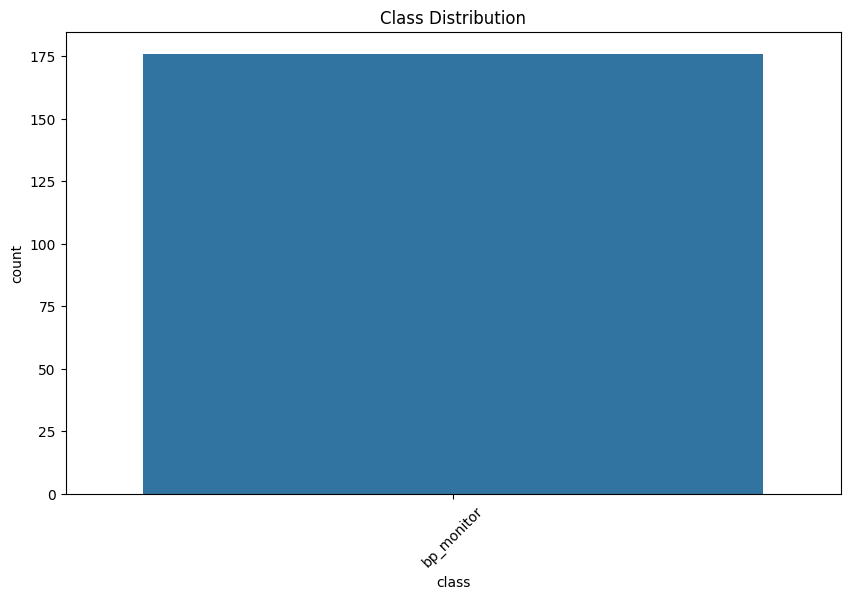

In [ ]:
# Distribution of classes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=all_annotations_df, x='class', order=all_annotations_df['class'].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

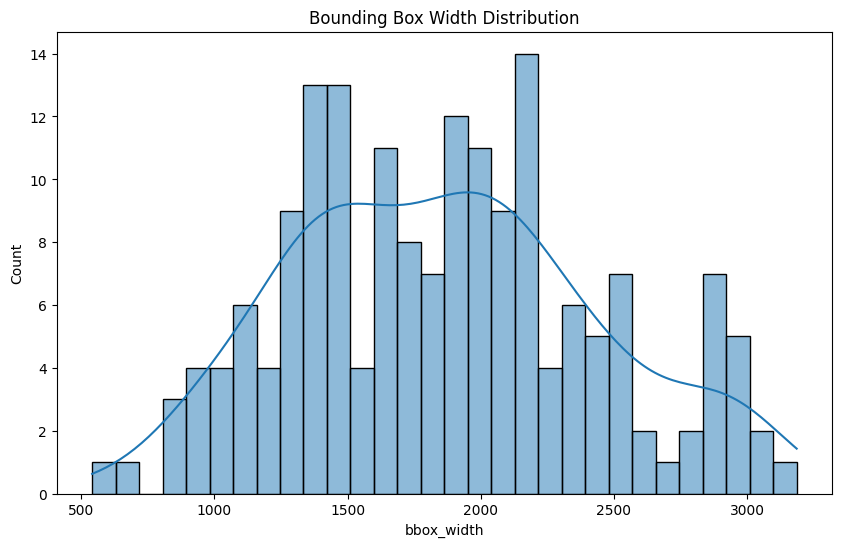

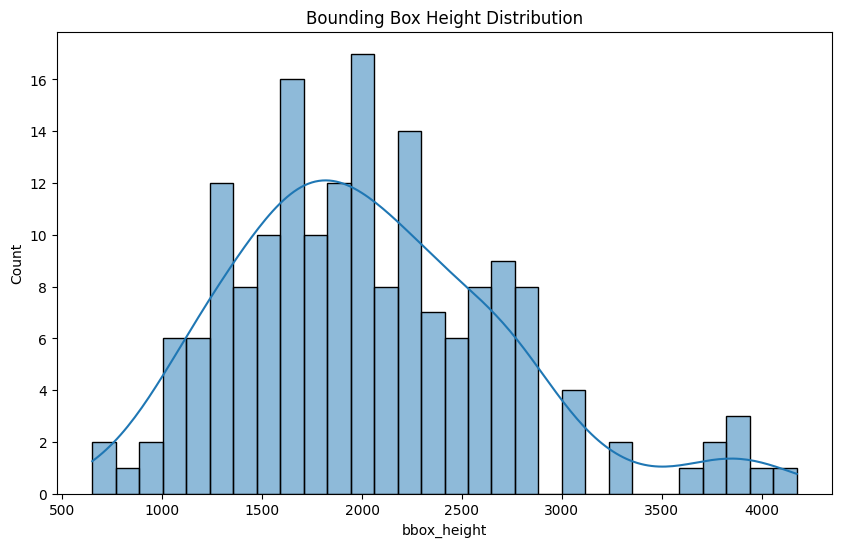

In [ ]:
# Bounding box sizes
all_annotations_df['bbox_width'] = all_annotations_df['xmax'] - all_annotations_df['xmin']
all_annotations_df['bbox_height'] = all_annotations_df['ymax'] - all_annotations_df['ymin']

plt.figure(figsize=(10, 6))
sns.histplot(all_annotations_df['bbox_width'], kde=True, bins=30)
plt.title("Bounding Box Width Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(all_annotations_df['bbox_height'], kde=True, bins=30)
plt.title("Bounding Box Height Distribution")
plt.show()

Visualize Sample Images with Annotations

In [ ]:
import matplotlib.patches as patches
import matplotlib.image as mpimg

def show_sample_image(image_file, annotations):
    img_path = os.path.join(images_dir, image_file)
    img = mpimg.imread(img_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for _, row in annotations.iterrows():
        rect = patches.Rectangle(
            (row['xmin'], row['ymin']),
            row['bbox_width'],
            row['bbox_height'],
            linewidth=1,
            edgecolor='r',
            facecolor='none'
        )
        ax.add_patch(rect)
        plt.text(row['xmin'], row['ymin'] - 10, row['class'], color='red', fontsize=12, weight='bold')

    plt.show()

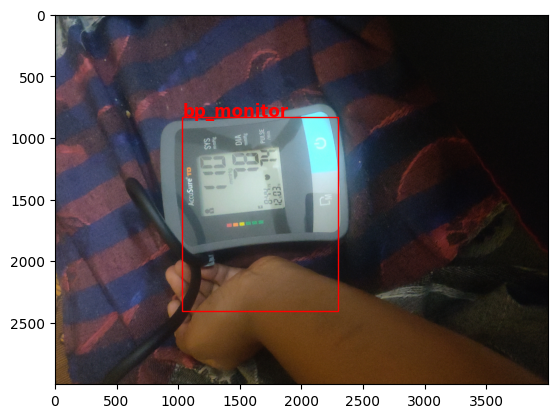

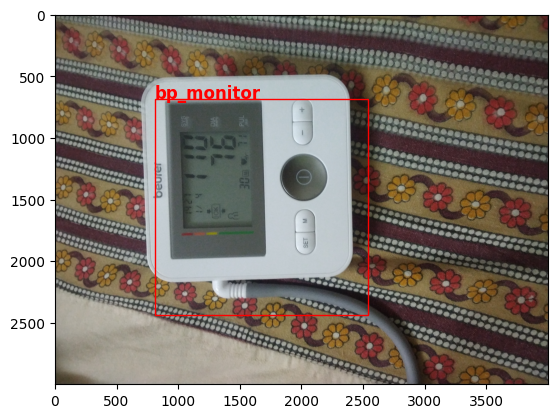

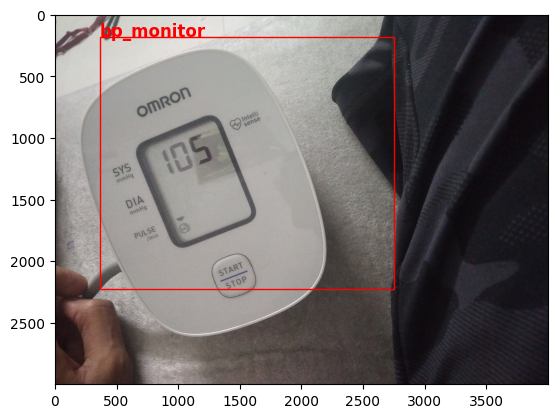

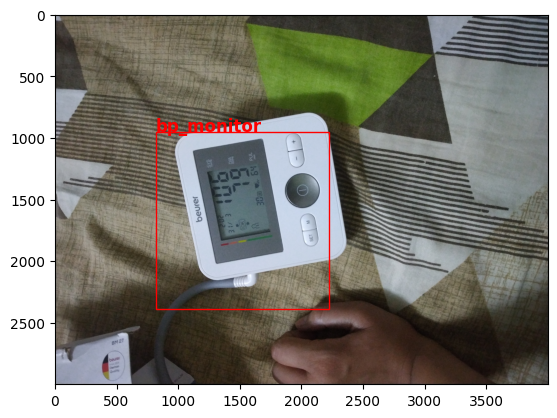

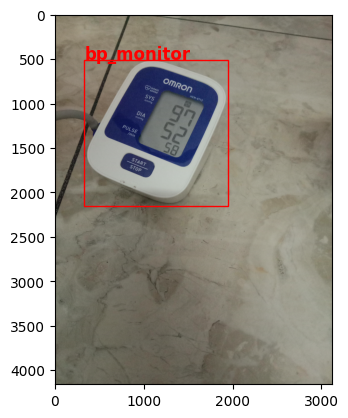

In [ ]:
# Display a few sample images with annotations
sample_images = all_annotations_df['filename'].unique()[:5]
for img_file in sample_images:
    img_annotations = all_annotations_df[all_annotations_df['filename'] == img_file]
    show_sample_image(img_file, img_annotations)

In [ ]:
import numpy as np
import pandas as pd
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Prepare data for training

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(all_annotations_df, test_size=0.2, random_state=42, stratify=all_annotations_df['class'])

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

Create and Train a Custom CNN Model

In [ ]:
import tensorflow as tf
class CustomDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, dataframe, directory, x_col, y_col, target_size=(224, 224), batch_size=32, shuffle=True):
        self.df = dataframe
        self.directory = directory
        self.x_col = x_col
        self.y_col = y_col
        self.target_size = target_size
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        batch_df = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        targets = []
        for _, row in batch_df.iterrows():
            img_path = os.path.join(self.directory, row[self.x_col])
            img = load_img(img_path, target_size=self.target_size)
            img = img_to_array(img)
            images.append(img)
            targets.append([row['xmin'], row['ymin'], row['xmax'], row['ymax']])

        return np.array(images), np.array(targets)

    def __next__(self):
        return self.__getitem__(self.index)

    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
        self.index = 0


In [ ]:
train_generator = CustomDataGenerator(dataframe=train_df, directory=images_dir, x_col='filename', y_col='class')
val_generator = CustomDataGenerator(dataframe=val_df, directory=images_dir, x_col='filename', y_col='class')

In [ ]:
# Define the custom CNN model
def create_custom_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='linear')  # 4 outputs for bounding box coordinates
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

# Create the model
input_shape = (224, 224, 3)
custom_cnn_model = create_custom_cnn(input_shape)

In [ ]:
# Train the model
cnn_history = custom_cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=len(train_df) // train_generator.batch_size,
    validation_steps=len(val_df) // val_generator.batch_size
)

Epoch 1/20
4/4 [==============================] - 45s 10s/step - loss: 3381241.5000 - accuracy: 0.4453 - val_loss: 2319713.5000 - val_accuracy: 0.2188
Epoch 2/20
4/4 [==============================] - 37s 9s/step - loss: 1704593.8750 - accuracy: 0.6719 - val_loss: 415807.5625 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 36s 9s/step - loss: 743717.6250 - accuracy: 0.7266 - val_loss: 376375.0938 - val_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 38s 9s/step - loss: 513754.5625 - accuracy: 0.7422 - val_loss: 530516.0000 - val_accuracy: 0.7812
Epoch 5/20
4/4 [==============================] - 37s 9s/step - loss: 478656.3438 - accuracy: 0.7344 - val_loss: 349990.6875 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 37s 9s/step - loss: 436394.5312 - accuracy: 0.7656 - val_loss: 354221.5000 - val_accuracy: 0.7812
Epoch 7/20
4/4 [==============================] - 39s 10s/step - loss: 400881.1875 - accuracy: 0.7109 - val_

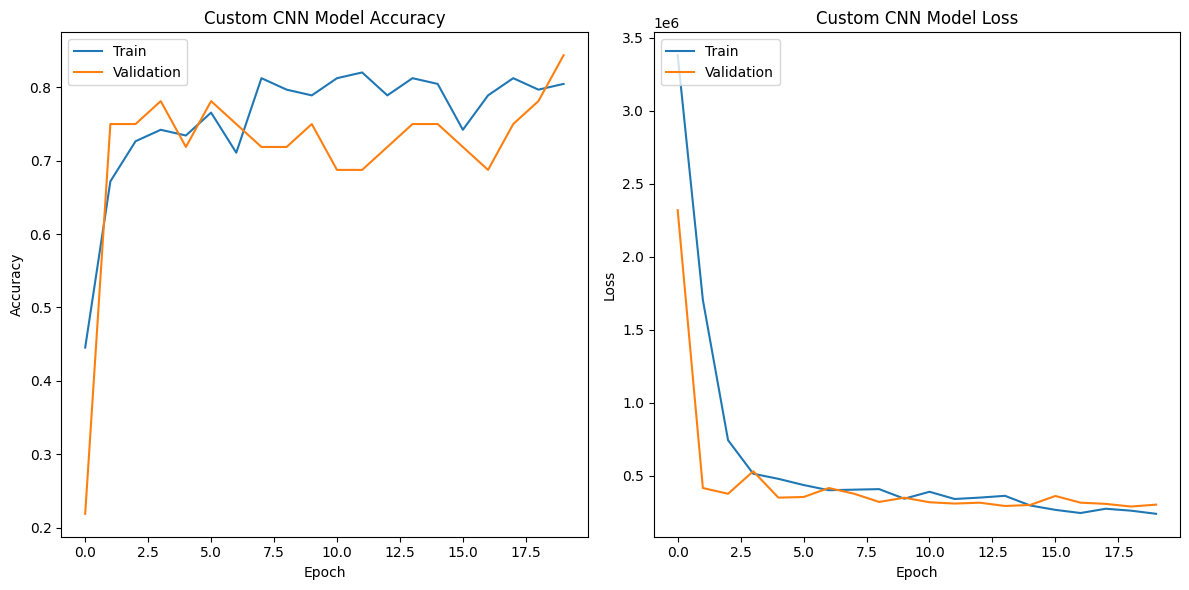

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot training history for custom CNN model
plt.figure(figsize=(12, 6))

# Plot custom CNN model accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Custom CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot custom CNN model loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Custom CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
plt.savefig('custom_cnn_model_performance.png')

In [ ]:
# Get the final training and validation accuracy for the custom CNN model
final_cnn_train_accuracy = cnn_history.history['accuracy'][-1]
final_cnn_val_accuracy = cnn_history.history['val_accuracy'][-1]
print(f"Final Training Accuracy for Custom CNN Model: {final_cnn_train_accuracy:.4f}")
print(f"Final Validation Accuracy for Custom CNN Model: {final_cnn_val_accuracy:.4f}")

Final Training Accuracy for Custom CNN Model: 0.7812
Final Validation Accuracy for Custom CNN Model: 0.8438


In [ ]:
# Save the model
custom_cnn_model.save(os.path.join(base_dir, 'Model', 'custom_cnn_model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Transfer learning using ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input

def create_resnet50_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(4, activation='linear')(x)  # 4 outputs for bounding box coordinates

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

# Create the model
input_shape = (224, 224, 3)
resnet50_model = create_resnet50_model(input_shape)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
from sklearn.preprocessing import LabelEncoder

class CustomDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, dataframe, directory, x_col, y_col, target_size=(224, 224), batch_size=32, shuffle=True):
        self.df = dataframe
        self.directory = directory
        self.x_col = x_col
        self.y_col = y_col
        self.target_size = target_size
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

        # Initialize LabelEncoder
        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(self.df[y_col])
        self.num_classes = len(self.label_encoder.classes_)

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        batch_df = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        targets = []
        for _, row in batch_df.iterrows():
            img_path = os.path.join(self.directory, row[self.x_col])
            img = load_img(img_path, target_size=self.target_size)
            img = img_to_array(img)
            images.append(img)
            targets.append([row['xmin'], row['ymin'], row['xmax'], row['ymax']])
      # Convert lists to arrays
        images = np.array(images)
        targets = np.array(targets)

        return images, targets

    def __next__(self):
        return self.__getitem__(self.index)

    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
        self.index = 0


In [ ]:
train_generator = CustomDataGenerator(dataframe=train_df, directory=images_dir, x_col='filename', y_col='class')
val_generator = CustomDataGenerator(dataframe=val_df, directory=images_dir, x_col='filename', y_col='class')

In [ ]:
# Train the model
resnet50_history = resnet50_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=len(train_df) // train_generator.batch_size,
    validation_steps=len(val_df) // val_generator.batch_size
)

Epoch 1/20
4/4 [==============================] - 69s 15s/step - loss: 2538300.5000 - accuracy: 0.6250 - val_loss: 785085.2500 - val_accuracy: 0.7500
Epoch 2/20
4/4 [==============================] - 60s 15s/step - loss: 564205.6250 - accuracy: 0.8125 - val_loss: 520011.6875 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 66s 16s/step - loss: 716549.6250 - accuracy: 0.7812 - val_loss: 660906.3125 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 59s 14s/step - loss: 540814.6250 - accuracy: 0.8516 - val_loss: 283559.3125 - val_accuracy: 0.7812
Epoch 5/20
4/4 [==============================] - 60s 14s/step - loss: 271230.3750 - accuracy: 0.8438 - val_loss: 223257.7969 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 64s 15s/step - loss: 283557.0000 - accuracy: 0.8125 - val_loss: 303474.6875 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 60s 14s/step - loss: 258281.9688 - accuracy: 0.8125 - v

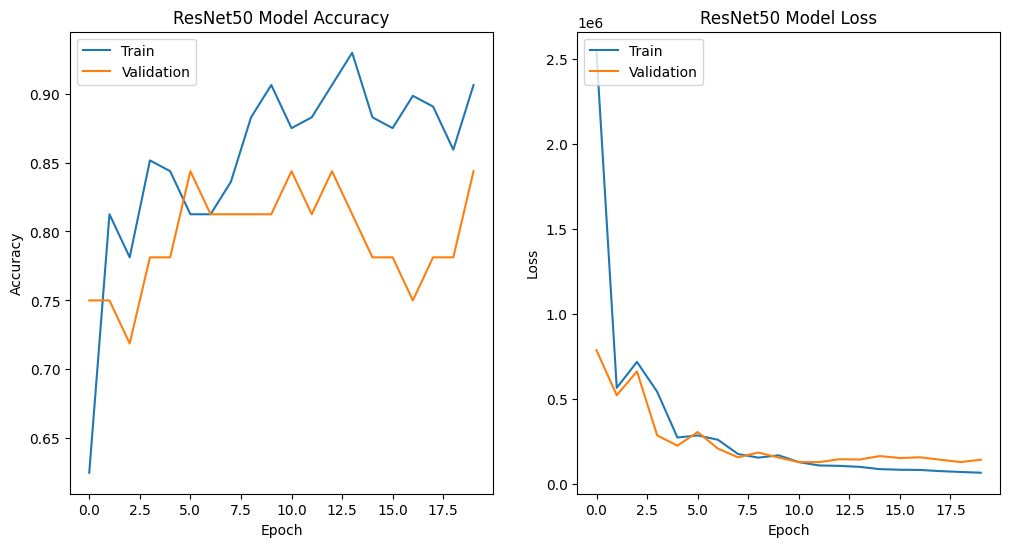

In [ ]:
plt.figure(figsize=(12, 6))

# Plot ResNet50 model accuracy
plt.subplot(1, 2, 1)
plt.plot(resnet50_history.history['accuracy'])
plt.plot(resnet50_history.history['val_accuracy'])
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot ResNet50 model loss
plt.subplot(1, 2, 2)
plt.plot(resnet50_history.history['loss'])
plt.plot(resnet50_history.history['val_loss'])
plt.title('ResNet50 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('resnet50_model_performance.png')

In [ ]:
final_resnet50_train_accuracy = resnet50_history.history['accuracy'][-1]
final_resnet50_val_accuracy = resnet50_history.history['val_accuracy'][-1]
print(f"Final Training Accuracy for ResNet50 Model: {final_resnet50_train_accuracy:.4f}")
print(f"Final Validation Accuracy for ResNet50 Model: {final_resnet50_val_accuracy:.4f}")

Final Training Accuracy for ResNet50 Model: 0.9062
Final Validation Accuracy for ResNet50 Model: 0.8438


In [ ]:
resnet50_model.save(os.path.join(base_dir, 'Model', 'resnet50_model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


RNN with CNN features

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, Reshape

def create_cnn_rnn_model(input_shape):
    cnn_input = Input(shape=input_shape)

    # CNN layers
    x = Conv2D(32, (3, 3), activation='relu')(cnn_input)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)

    # Reshape for RNN
    x = Reshape((1, -1))(x)

    # RNN layers
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(128)(x)

    # Fully connected layer
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(4, activation='linear')(x)

    model = Model(inputs=cnn_input, outputs=output)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    return model

# Create the RNN with CNN model
input_shape = (224, 224, 3)
cnn_rnn_model = create_cnn_rnn_model(input_shape)

In [ ]:
train_generator = CustomDataGenerator(dataframe=train_df, directory=images_dir, x_col='filename', y_col='class')
val_generator = CustomDataGenerator(dataframe=val_df, directory=images_dir, x_col='filename', y_col='class')

In [ ]:
# Train the RNN with CNN model
cnn_rnn_history = cnn_rnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=len(train_df) // train_generator.batch_size,
    validation_steps=len(val_df) // val_generator.batch_size
)

Epoch 1/20
4/4 [==============================] - 57s 10s/step - loss: 3876730.5000 - accuracy: 0.6328 - val_loss: 3915739.0000 - val_accuracy: 0.7500
Epoch 2/20
4/4 [==============================] - 38s 9s/step - loss: 3937081.0000 - accuracy: 0.8281 - val_loss: 3816848.7500 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 44s 11s/step - loss: 3828317.5000 - accuracy: 0.8125 - val_loss: 4011347.0000 - val_accuracy: 0.8125
Epoch 4/20
4/4 [==============================] - 40s 9s/step - loss: 3828812.5000 - accuracy: 0.8203 - val_loss: 3963457.0000 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 40s 10s/step - loss: 3900052.5000 - accuracy: 0.8047 - val_loss: 3885724.5000 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 38s 9s/step - loss: 3869283.0000 - accuracy: 0.8438 - val_loss: 3854633.2500 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 39s 9s/step - loss: 3828818.7500 - accuracy: 0.

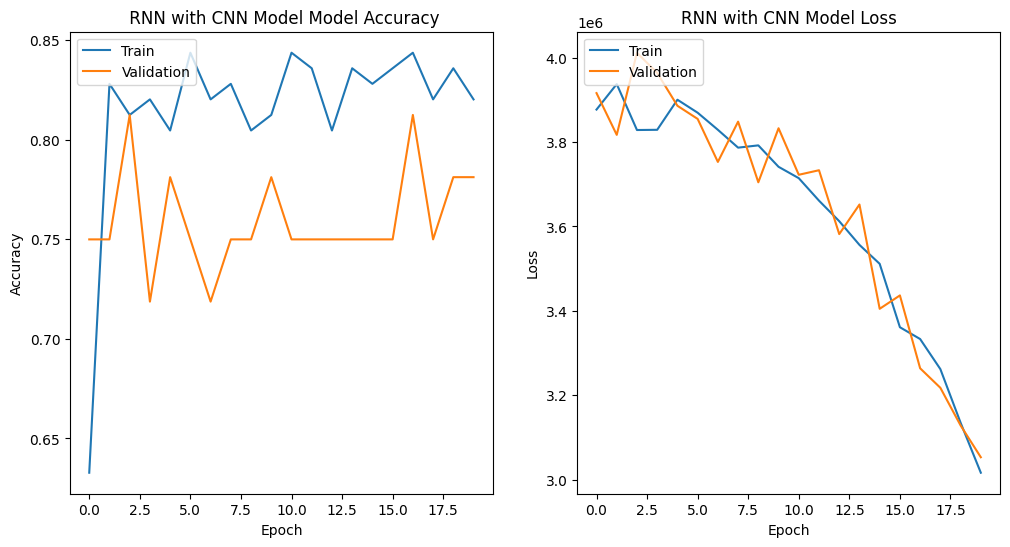

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_rnn_history.history['accuracy'])
plt.plot(cnn_rnn_history.history['val_accuracy'])
plt.title(' RNN with CNN Model Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(cnn_rnn_history.history['loss'])
plt.plot(cnn_rnn_history.history['val_loss'])
plt.title('RNN with CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('rnn_cnn_model_performance.png')

In [ ]:
final_cnn_rnn_train_accuracy = cnn_rnn_history.history['accuracy'][-1]
final_cnn_rnn_val_accuracy = cnn_rnn_history.history['val_accuracy'][-1]
print(f"Final Training Accuracy for RNN with CNN features Model: {final_cnn_rnn_train_accuracy:.4f}")
print(f"Final Validation Accuracy for RNN with CNN Model: {final_cnn_rnn_val_accuracy:.4f}")

Final Training Accuracy for RNN with CNN features Model: 0.8203
Final Validation Accuracy for RNN with CNN Model: 0.7812


In [ ]:
cnn_rnn_model.save(os.path.join(base_dir, 'Model', 'cnn_rnn_model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
